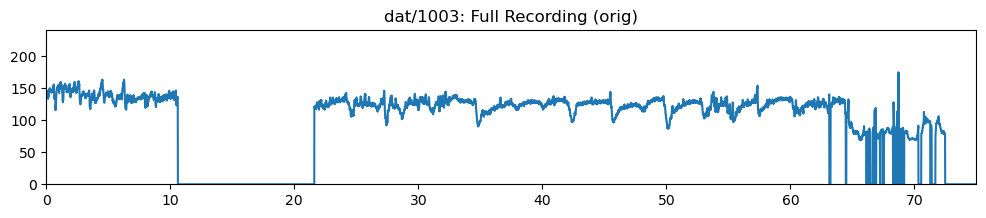

[0.00000e+00 2.50000e-01 5.00000e-01 ... 3.32475e+03 3.32500e+03
 3.32525e+03]
13302


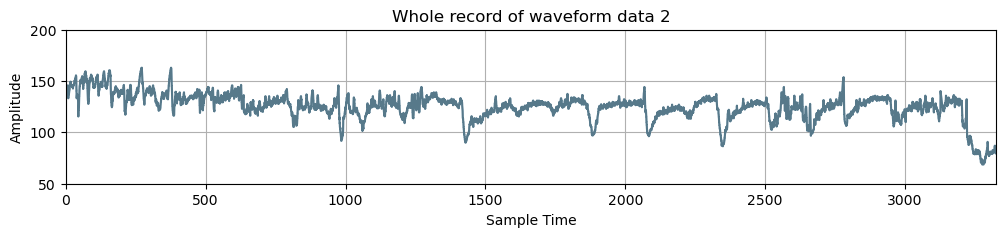

In [28]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
!pip install wfdb;
import wfdb;

import simple_denoise;
from simple_denoise import get_valid_segments;


FILEPATH = 'dat/1003'

signals, fields = wfdb.rdsamp(FILEPATH)

#print('nSamples: {}'.format(signals.shape))

# transpose the matrix as originally it was vertical
signals = np.transpose(signals)

#print(signals[0])

fetal_hr = signals[0]

# Calculate the number of samples corresponding to one minute
Fs = 1000  # Sampling frequency (adjust this according to your data)
duration_seconds = 60  # One minute
num_samples_one_minute = int(Fs * duration_seconds)
ts = np.arange(len(fetal_hr))/4.0

selected_segments = get_valid_segments(fetal_hr, ts, FILEPATH, verbose=True,
                                           #max_change=15, verbose_details=True
                                          )
len_s = len(selected_segments)
new_signal = []

for i in range(len_s):
    new_signal.extend(selected_segments[i]['seg_hr'])

new_time = np.arange(len(new_signal))/4.0

#print(new_time)
#print(len(new_time))


plt.figure(figsize=(12, 2))
plt.title('{}: Final Signal  {}-{}'.format(FILEPATH, 0, new_signal_time))
plt.plot(new_time, new_signal)
plt.plot(new_time, new_signal, alpha=0.25)
plt.xlim(new_time[0], new_time[-1])
plt.ylim(50, 200)
plt.xlabel('Sample Time in Seconds')
plt.ylabel('Amplitude')
plt.title('Whole record of Waveform Data 2')
plt.grid(True)
plt.show()